In [15]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

## Data Preprocessing 

In [2]:
# Load the Sentiment140 dataset
df = pd.read_csv('D:\\Sentiment140.csv', header=None, encoding='ISO-8859-1', names=['target', 'id', 'date', 'flag', 'user', 'text'])

# Drop unnecessary columns
df = df.drop(['id', 'date', 'flag', 'user'], axis=1)

# Define a function for data preprocessing
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove usernames
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    # Remove hashtags
    text = re.sub(r'#', '', text)
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # Lemmatize the text
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

# Apply the preprocess_text function to the 'text' column
df['text'] = df['text'].apply(preprocess_text)

## Data visualization :

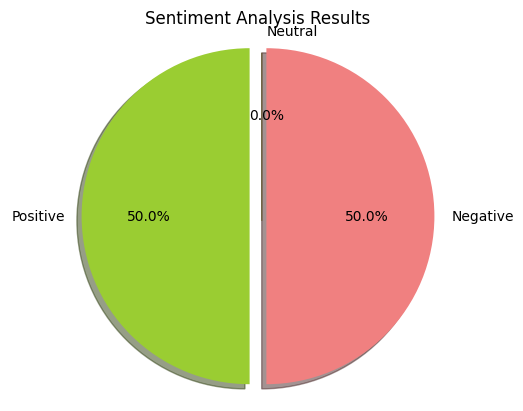

In [3]:

# Calculate the number of positive, negative, and neutral tweets
positive_tweets = df[df['target'] == 4].shape[0]
negative_tweets = df[df['target'] == 0].shape[0]
neutral_tweets = df[df['target'] == 2].shape[0]

# Create a pie chart
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_tweets, negative_tweets, neutral_tweets]
colors = ['yellowgreen', 'lightcoral', 'gold']
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Sentiment Analysis Results')
plt.show()

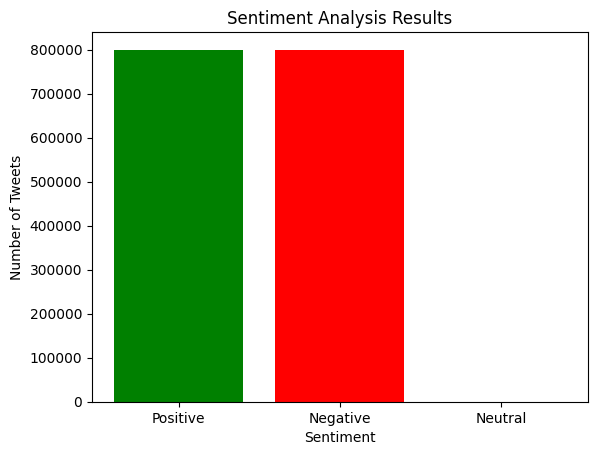

In [4]:

# Calculate the number of positive, negative, and neutral tweets
positive_tweets = df[df['target'] == 4].shape[0]
negative_tweets = df[df['target'] == 0].shape[0]
neutral_tweets = df[df['target'] == 2].shape[0]

# Create a bar chart
x = ['Positive', 'Negative', 'Neutral']
y = [positive_tweets, negative_tweets, neutral_tweets]
colors = ['green', 'red', 'grey']
plt.bar(x, y, color=colors)
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

## Naive Bayes

In [5]:

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)

# Vectorize the text data using a bag-of-words approach
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Naive Bayes classifier on the training data
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

# Predict the sentiment of the test data using the trained classifier
y_pred = nb.predict(X_test_vec)

# Evaluate the performance of the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77    159494
           4       0.78      0.75      0.76    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



From the results, We can conclude that the model achieved an overall accuracy of 0.77, which means that it correctly classified 77% of the test data. The precision and recall for both classes (0 and 4) are fairly similar, with slightly higher precision for class 4 and slightly higher recall for class 0. The F1-score, which is the harmonic mean of precision and recall, is also similar for both classes.

Overall, these results suggest that the model performs reasonably well in classifying the sentiment of the text data, but there may still be some room for improvement.

<Axes: >

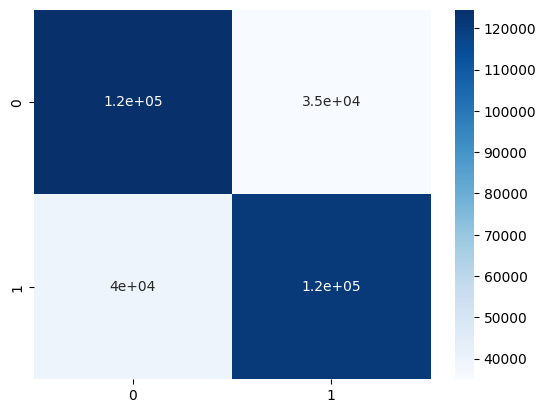

In [6]:
#confusion matrix 

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')


## Logistic Regression

In [9]:
# Train a Logistic Regression classifier on the training data
lr = LogisticRegression(random_state=42)
lr.fit(X_train_vec, y_train)

# Predict the sentiment of the test data using the trained classifier
y_pred = lr.predict(X_test_vec)

# Evaluate the performance of the classifier
print(classification_report(y_test, y_pred))

D:\anaconda\envs\Work\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.79      0.75      0.77    159494
           4       0.76      0.80      0.78    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



The precision for positive sentiment (4) is 76%, which means that when the model predicts a tweet as positive, it is correct 76% of the time. The recall for positive sentiment is 80%, which means that the model correctly identifies 80% of the positive tweets.

The precision for negative sentiment (0) is 79%, which means that when the model predicts a tweet as negative, it is correct 79% of the time. The recall for negative sentiment is 75%, which means that the model correctly identifies 75% of the negative tweets.

The F1-score for positive and negative sentiment is 0.78, which is the harmonic mean of precision and recall, and provides an overall measure of the model's performance.

<Axes: >

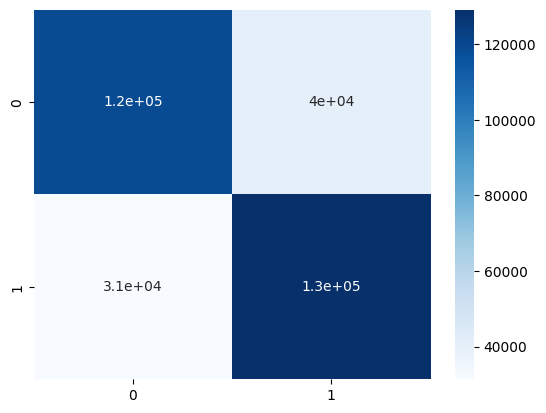

In [10]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')

## Gradient Boosting

In [12]:
# Train a Gradient Boosting classifier on the training data
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train_vec, y_train)

# Predict the sentiment of the test data using the trained classifier
y_pred = gbc.predict(X_test_vec)

# Evaluate the performance of the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.48      0.60    159494
           4       0.63      0.87      0.73    160506

    accuracy                           0.68    320000
   macro avg       0.71      0.68      0.67    320000
weighted avg       0.71      0.68      0.67    320000



<Axes: >

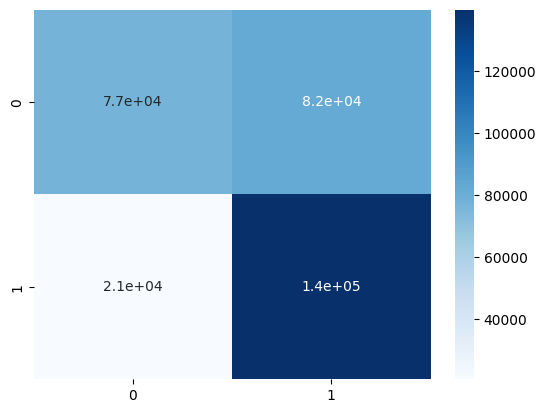

In [13]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')

From the results of the gradient boosting model, we can conclude that the model has an overall accuracy of 0.68, which is lower than the accuracy of the logistic regression model. The precision and recall for the positive class (label 4) are lower than those of the logistic regression model, while the precision and recall for the negative class (label 0) are higher. 

In summary, while the gradient boosting model has a lower overall accuracy than the logistic regression model, it performs better in identifying negative sentiment tweets. However, it struggles with identifying positive sentiment tweets, which is an important aspect of sentiment analysis.

## Random Forest

In [16]:
# Train a Random Forest classifier on the training data
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train_vec, y_train)

# Predict the sentiment of the test data using the trained classifier
y_pred = rfc.predict(X_test_vec)

# Evaluate the performance of the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77    159494
           4       0.77      0.77      0.77    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



<Axes: >

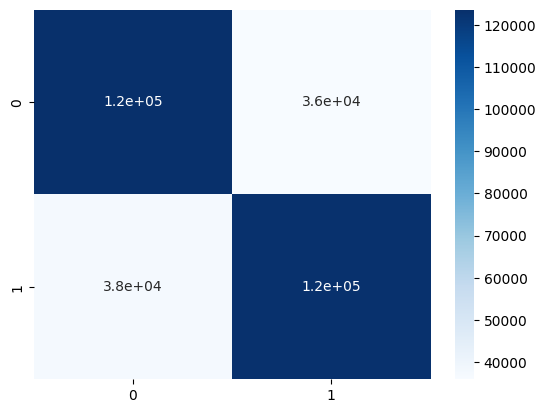

In [17]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')

The precision and recall values for both classes (0 and 4) are almost identical, indicating that the model is performing similarly well for both positive and negative sentiment classification.

The overall accuracy of the model is 77%, which means that it correctly classified 77% of the tweets in the test set.

The macro-average F1-score is also 77%, which indicates a good balance between precision and recall for both classes.

The weighted-average F1-score is also 77%, which means that the model is equally good at classifying both positive and negative tweets.